In [34]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

In [35]:
defn = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
defn=defn. iloc[::-1]
defn.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [36]:
defn.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


In [37]:
defn.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [38]:
defn.shape

(2035, 8)

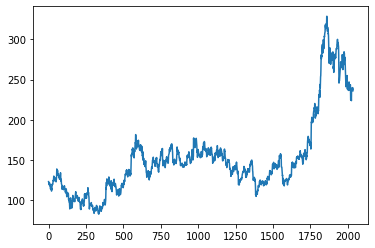

In [39]:
defn_high=defn.reset_index()['High']
plt.plot(defn_high)

In [40]:
sclr = MinMaxScaler(feature_range = (0,1))
defn_high = sclr.fit_transform(np.array(defn_high).reshape(-1,1))

In [41]:
defn_high.shape
defn_high

array([[0.16344786],
       [0.15938199],
       [0.15917869],
       ...,
       [0.6391543 ],
       [0.62614353],
       [0.62268754]])

In [42]:
trainsz = int(len(defn_high) * 0.75)
testsz = len(defn_high) - trainsz
traindata, testdata = defn_high[0:trainsz,:], defn_high[trainsz:len(defn_high),:1]

In [43]:
trainsz,testsz

(1526, 509)

In [44]:
def create_dataset(dataset, tstep = 1):
    dX, dY = [], []
    for i in range(len(dataset) - tstep - 1):
        v = dataset[i:(i+tstep), 0]
        dX.append(v)
        dY.append(dataset[i+tstep, 0])
    return np.array(dX), np.array(dY)

    
tstep = 100
xtrainer, ytrainer = create_dataset(traindata, tstep)
xtester, ytester = create_dataset(testdata, tstep)

In [45]:
xtrainer = xtrainer.reshape(xtrainer.shape[0], xtrainer.shape[1], 1)
xtester = xtester.reshape(xtester.shape[0], xtester.shape[1], 1)

print(xtrainer.shape), print(ytrainer.shape)
print(xtester.shape), print(ytester.shape)

(1425, 100, 1)
(1425,)
(408, 100, 1)
(408,)


(None, None)

In [16]:
mdl = Sequential()
mdl.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
mdl.add(LSTM(50, return_sequences = True))
mdl.add(LSTM(50))
mdl.add(Dense(1))
mdl.compile(loss = 'mean_squared_error', optimizer = 'adam')


mdl.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [17]:
mdl.fit(xtrainer, ytrainer, validation_data = (xtester, ytester), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 7s 285ms/step - loss: 0.0110 - val_loss: 0.0533
Epoch 2/100
23/23 [==============================] - 4s 181ms/step - loss: 0.0021 - val_loss: 0.0089
Epoch 3/100
23/23 [==============================] - 7s 322ms/step - loss: 8.9759e-04 - val_loss: 0.0057
Epoch 4/100
23/23 [==============================] - 6s 262ms/step - loss: 7.7946e-04 - val_loss: 0.0072
Epoch 5/100
23/23 [==============================] - 6s 250ms/step - loss: 7.6630e-04 - val_loss: 0.0063
Epoch 6/100
23/23 [==============================] - 6s 265ms/step - loss: 7.3302e-04 - val_loss: 0.0051
Epoch 7/100
23/23 [==============================] - 6s 270ms/step - loss: 7.0915e-04 - val_loss: 0.0045
Epoch 8/100
23/23 [==============================] - 7s 289ms/step - loss: 6.8688e-04 - val_loss: 0.0070
Epoch 9/100
23/23 [==============================] - 7s 286ms/step - loss: 6.6806e-04 - val_loss: 0.0060
Epoch 10/100
23/23 [==============================] - 9s 373ms/

Epoch 78/100
23/23 [==============================] - 6s 260ms/step - loss: 1.2878e-04 - val_loss: 3.7674e-04
Epoch 79/100
23/23 [==============================] - 6s 278ms/step - loss: 1.2283e-04 - val_loss: 4.5556e-04
Epoch 80/100
23/23 [==============================] - 7s 288ms/step - loss: 1.1633e-04 - val_loss: 3.8772e-04
Epoch 81/100
23/23 [==============================] - 7s 288ms/step - loss: 1.1578e-04 - val_loss: 4.2215e-04
Epoch 82/100
23/23 [==============================] - 6s 267ms/step - loss: 1.2106e-04 - val_loss: 3.9894e-04
Epoch 83/100
23/23 [==============================] - 8s 352ms/step - loss: 1.1535e-04 - val_loss: 4.4457e-04
Epoch 84/100
23/23 [==============================] - 7s 284ms/step - loss: 1.1437e-04 - val_loss: 4.5520e-04
Epoch 85/100
23/23 [==============================] - 8s 346ms/step - loss: 1.2735e-04 - val_loss: 6.3348e-04
Epoch 86/100
23/23 [==============================] - 9s 371ms/step - loss: 1.1792e-04 - val_loss: 4.1960e-04
Epoch 87/1

In [46]:
trpd = mdl.predict(xtrainer)
tpd = mdl.predict(xtester)
trpd = sclr.inverse_transform(trpd)
tpd = sclr.inverse_transform(tpd)
math.sqrt(mean_squared_error(ytrainer, trpd))

137.21639340146942

In [47]:
math.sqrt(mean_squared_error(ytester, tpd))


236.30112523776165

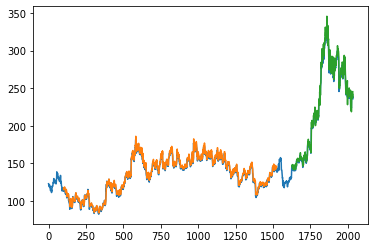

Green indicates the predicted data
Blue indicates the complete data
Orange indicates the trained data


In [48]:
lb = 100
trpdPlot = np.empty_like(defn_high)
trpdPlot[:,:] = np.nan
trpdPlot[lb:len(trpd) + lb, :] = trpd
tpdPlot = np.empty_like(defn_high)
tpdPlot[:,:] = np.nan
tpdPlot[len(trpd) + (lb * 2)+1:len(defn_high) - 1, :] = tpd

plt.plot(sclr.inverse_transform(defn_high))
plt.plot(trpdPlot)
plt.plot(tpdPlot)
plt.show()
print("Green indicates the predicted data")
print("Blue indicates the complete data")
print("Orange indicates the trained data")

In [49]:
len(testdata), xtester.shape

(509, (408, 100, 1))

In [50]:
xinput = testdata[409:].reshape(1,-1)
xinput.shape

(1, 100)

In [51]:
tmpinput = list(xinput)
temp_input = tmpinput[0].tolist()
lstoutput=[]
nossteps=100
nextNumberOfDays = 28
i=0
while(i<nextNumberOfDays):
    if(len(temp_input)>100):
        xinput=np.array(temp_input[1:])
        print("{} day input {}".format(i,xinput))
        xinput=xinput.reshape(1,-1)
        xinput = xinput.reshape((1, nossteps, 1))
        yhat = mdl.predict(xinput, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lstoutput.extend(yhat.tolist())
        i=i+1
    else:
        xinput = xinput.reshape((1, nossteps,1))
        yhat = mdl.predict(xinput, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lstoutput.extend(yhat.tolist())
        i=i+1
print(lstoutput)

[0.6370136]
101
1 day input [0.86013417 0.85464525 0.84448059 0.8072779  0.71843871 0.66192316
 0.67696686 0.67554381 0.67310429 0.68428542 0.68936776 0.70217524
 0.71803212 0.72941655 0.73144948 0.74486684 0.76926205 0.75991055
 0.74242732 0.73958122 0.74771295 0.75991055 0.7584875  0.76621264
 0.75462492 0.76316324 0.79670665 0.80585485 0.7889815  0.78003659
 0.73978451 0.73002643 0.73490547 0.74872942 0.75991055 0.75462492
 0.75401504 0.76174019 0.7737345  0.82008538 0.80585485 0.81154706
 0.77434438 0.78633869 0.79284407 0.78328929 0.77109169 0.74385038
 0.71193332 0.68733482 0.67818662 0.65257166 0.64301687 0.65643423
 0.67656028 0.67371417 0.65114861 0.65521447 0.66761537 0.67838992
 0.69993901 0.63122586 0.63508843 0.64098394 0.64545639 0.64118723
 0.63854442 0.63081927 0.62472047 0.6330555  0.64728603 0.6574507
 0.66761537 0.66720878 0.64159382 0.62776987 0.63651149 0.63630819
 0.62980281 0.62817646 0.63813783 0.65358813 0.63183574 0.57653995
 0.57816629 0.57613336 0.61943484 0

8 day output [[0.7630645]]
9 day input [0.67310429 0.68428542 0.68936776 0.70217524 0.71803212 0.72941655
 0.73144948 0.74486684 0.76926205 0.75991055 0.74242732 0.73958122
 0.74771295 0.75991055 0.7584875  0.76621264 0.75462492 0.76316324
 0.79670665 0.80585485 0.7889815  0.78003659 0.73978451 0.73002643
 0.73490547 0.74872942 0.75991055 0.75462492 0.75401504 0.76174019
 0.7737345  0.82008538 0.80585485 0.81154706 0.77434438 0.78633869
 0.79284407 0.78328929 0.77109169 0.74385038 0.71193332 0.68733482
 0.67818662 0.65257166 0.64301687 0.65643423 0.67656028 0.67371417
 0.65114861 0.65521447 0.66761537 0.67838992 0.69993901 0.63122586
 0.63508843 0.64098394 0.64545639 0.64118723 0.63854442 0.63081927
 0.62472047 0.6330555  0.64728603 0.6574507  0.66761537 0.66720878
 0.64159382 0.62776987 0.63651149 0.63630819 0.62980281 0.62817646
 0.63813783 0.65358813 0.63183574 0.57653995 0.57816629 0.57613336
 0.61943484 0.57979264 0.57288067 0.62573694 0.63102257 0.6361049
 0.62776987 0.6269567  0

16 day output [[0.9458761]]
17 day input [0.76926205 0.75991055 0.74242732 0.73958122 0.74771295 0.75991055
 0.7584875  0.76621264 0.75462492 0.76316324 0.79670665 0.80585485
 0.7889815  0.78003659 0.73978451 0.73002643 0.73490547 0.74872942
 0.75991055 0.75462492 0.75401504 0.76174019 0.7737345  0.82008538
 0.80585485 0.81154706 0.77434438 0.78633869 0.79284407 0.78328929
 0.77109169 0.74385038 0.71193332 0.68733482 0.67818662 0.65257166
 0.64301687 0.65643423 0.67656028 0.67371417 0.65114861 0.65521447
 0.66761537 0.67838992 0.69993901 0.63122586 0.63508843 0.64098394
 0.64545639 0.64118723 0.63854442 0.63081927 0.62472047 0.6330555
 0.64728603 0.6574507  0.66761537 0.66720878 0.64159382 0.62776987
 0.63651149 0.63630819 0.62980281 0.62817646 0.63813783 0.65358813
 0.63183574 0.57653995 0.57816629 0.57613336 0.61943484 0.57979264
 0.57288067 0.62573694 0.63102257 0.6361049  0.62776987 0.6269567
 0.63590161 0.62594023 0.6391543  0.62614353 0.62268754 0.63701361
 0.65359759 0.66991287 

24 day output [[1.2495425]]
25 day input [0.75462492 0.76316324 0.79670665 0.80585485 0.7889815  0.78003659
 0.73978451 0.73002643 0.73490547 0.74872942 0.75991055 0.75462492
 0.75401504 0.76174019 0.7737345  0.82008538 0.80585485 0.81154706
 0.77434438 0.78633869 0.79284407 0.78328929 0.77109169 0.74385038
 0.71193332 0.68733482 0.67818662 0.65257166 0.64301687 0.65643423
 0.67656028 0.67371417 0.65114861 0.65521447 0.66761537 0.67838992
 0.69993901 0.63122586 0.63508843 0.64098394 0.64545639 0.64118723
 0.63854442 0.63081927 0.62472047 0.6330555  0.64728603 0.6574507
 0.66761537 0.66720878 0.64159382 0.62776987 0.63651149 0.63630819
 0.62980281 0.62817646 0.63813783 0.65358813 0.63183574 0.57653995
 0.57816629 0.57613336 0.61943484 0.57979264 0.57288067 0.62573694
 0.63102257 0.6361049  0.62776987 0.6269567  0.63590161 0.62594023
 0.6391543  0.62614353 0.62268754 0.63701361 0.65359759 0.66991287
 0.68561721 0.70115513 0.71706975 0.73366386 0.74847287 0.7630645
 0.77895784 0.79662979 

In [52]:
dnew = np.arange(1,101)
dpred = np.arange(101,129)
dnew.shape

(100,)

In [53]:
dpred.shape

(28,)

In [54]:
defn3 = defn_high.tolist()
defn3.extend(lstoutput)

len(defn_high)

2035

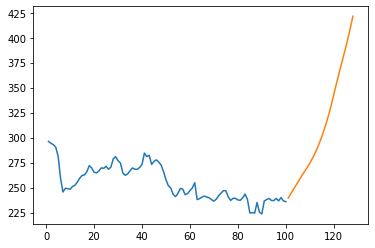

In [55]:
plt.plot(dnew, sclr.inverse_transform(defn_high[1935:]))
plt.plot(dpred, sclr.inverse_transform(lstoutput))

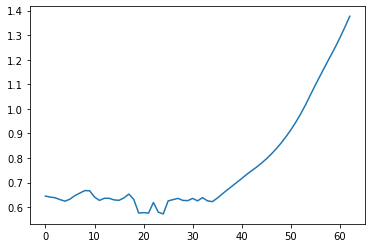

In [56]:
defn3=defn_high.tolist()
defn3.extend(lstoutput)
plt.plot(defn3[2000:])

In [57]:
defn3=sclr.inverse_transform(defn3).tolist()

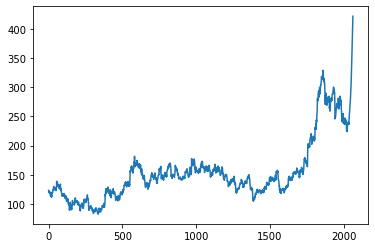

In [58]:
plt.plot(defn3)